In [1]:
import pandas as pd

In [2]:
full_df = pd.read_csv('TopicModellingConsumerComplaint.csv')

In [3]:
full_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
1,01/19/2017,Student loan,Federal student loan servicing,Dealing with my lender or servicer,Received bad information about my loan,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,NaN,Consent provided,Web,01/19/2017,Closed with explanation,Yes,No,2296496
2,04/06/2018,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Older American,Consent provided,Web,04/06/2018,Closed with explanation,Yes,NaN,2866101
3,06/08/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06/10/2014,Closed with explanation,Yes,Yes,885638
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760


In [4]:
df = full_df[["Consumer complaint narrative","Product"]]

In [5]:
df.head()

,Consumer complaint narrative,Product
0,NaN,Mortgage
1,When my loan was switched over to Navient i wa...,Student loan
2,I tried to sign up for a spending monitoring p...,Credit card or prepaid card
3,NaN,Credit card
4,NaN,Debt collection


In [6]:
df.dropna(inplace=True)

C:\Users\Mrunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df.rename(columns={'Consumer complaint narrative':'X', 'Product':'y'}, inplace=True)

C:\Users\Mrunal\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [8]:
df.head()

,X,y
1,When my loan was switched over to Navient i wa...,Student loan
2,I tried to sign up for a spending monitoring p...,Credit card or prepaid card
7,"My mortgage is with BB & T Bank, recently I ha...",Mortgage
13,The entire lending experience with Citizens Ba...,Mortgage
14,My credit score has gone down XXXX points in t...,Credit reporting


In [9]:
print(df['X'][1])

When my loan was switched over to Navient i was never told that i had a deliquint balance because with XXXX i did not. When going to purchase a vehicle i discovered my credit score had been dropped from the XXXX into the XXXX. I have been faithful at paying my student loan. I was told that Navient was the company i had delinquency with. I contacted Navient to resolve this issue you and kept being told to just contact the credit bureaus and expalin the situation and maybe they could help me. I was so angry that i just hurried and paid the balance off and then after tried to dispute the delinquency with the credit bureaus. I have had so much trouble bringing my credit score back up.


In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.tokenize import word_tokenize
from collections import Counter
import operator
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mrunal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
#Bag of words creation

stopwords_set = set(stopwords.words('english'))
stopwords_set.add('xxxx')
custom = list(stopwords_set)+list(punctuation)+['``', "'s", "...", "n't"]

In [12]:
first_five_complaints = df['X'][:5]

In [13]:
#1 - lowercase
BoW = first_five_complaints.str.lower()

In [14]:
# 2 - Tokenize
BoW = [word_tokenize(x) for x in BoW]

In [15]:
#3 - flatten
BoW = [item for sublist in BoW for item in sublist]

In [16]:
#4 - stopwords
BoW = [x for x in BoW if x not in custom]

In [17]:
#5 - Initiate lemmatizer
lemmatizer = WordNetLemmatizer()

In [18]:
#6 - lemmatize
BoW = [lemmatizer.lemmatize(x) for x in BoW]

In [19]:
#7 - create dictionary using Count
BoW_dict = dict(Counter(BoW))

In [20]:
#8 - Sort dictionary in reverse
sorted_d = sorted(BoW_dict.items(), key = operator.itemgetter(1), reverse=True)

In [21]:
print("\nTop 10 words:\n", sorted_d[:10])


Top 10 words:
 [('payment', 12), ('closing', 12), ('account', 11), ('credit', 8), ('mortgage', 8), ('rate', 8), ('would', 8), ('bank', 7), ('fixed', 7), ('could', 6)]


In [22]:
pip install -U textblob

Requirement already up-to-date: textblob in c:\users\mrunal\anaconda3\lib\site-packages (0.15.3)
Note: you may need to restart the kernel to use updated packages.


In [23]:
from collections import Counter
import operator
import numpy as np
import nltk
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [24]:
#PARTS OF SPEECH TAGGING (POS tagging)

top_10 = sorted_d[:10]

top_words = []
for i in top_10:
    top_words.append(i[0])
    
nltk.download('brown')

BoW_joined = " ".join(BoW)

blob = TextBlob(BoW_joined)

nltk.download('averaged_perceptron_tagger')

tags = blob.tags
tags

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Mrunal\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Mrunal\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('loan', 'NN'),
 ('switched', 'VBD'),
 ('navient', 'JJ'),
 ('never', 'RB'),
 ('told', 'VBD'),
 ('deliquint', 'NN'),
 ('balance', 'NN'),
 ('going', 'VBG'),
 ('purchase', 'NN'),
 ('vehicle', 'NN'),
 ('discovered', 'VBD'),
 ('credit', 'NN'),
 ('score', 'NN'),
 ('dropped', 'VBD'),
 ('faithful', 'JJ'),
 ('paying', 'VBG'),
 ('student', 'NN'),
 ('loan', 'NN'),
 ('told', 'VBD'),
 ('navient', 'JJ'),
 ('company', 'NN'),
 ('delinquency', 'NN'),
 ('contacted', 'VBD'),
 ('navient', 'JJ'),
 ('resolve', 'NN'),
 ('issue', 'NN'),
 ('kept', 'VBD'),
 ('told', 'VBN'),
 ('contact', 'NN'),
 ('credit', 'NN'),
 ('bureau', 'NN'),
 ('expalin', 'JJ'),
 ('situation', 'NN'),
 ('maybe', 'RB'),
 ('could', 'MD'),
 ('help', 'VB'),
 ('angry', 'JJ'),
 ('hurried', 'VBN'),
 ('paid', 'VBN'),
 ('balance', 'NN'),
 ('tried', 'VBD'),
 ('dispute', 'JJ'),
 ('delinquency', 'NN'),
 ('credit', 'NN'),
 ('bureau', 'NN'),
 ('much', 'JJ'),
 ('trouble', 'NN'),
 ('bringing', 'VBG'),
 ('credit', 'NN'),
 ('score', 'NN'),
 ('back', 'RB'),


In [25]:
nouns = []

for x in tags:
    if x[1]=="NN":
        nouns.append(x[0])

In [26]:
nouns

['loan',
 'deliquint',
 'balance',
 'purchase',
 'vehicle',
 'credit',
 'score',
 'student',
 'loan',
 'company',
 'delinquency',
 'resolve',
 'issue',
 'contact',
 'credit',
 'bureau',
 'situation',
 'balance',
 'delinquency',
 'credit',
 'bureau',
 'trouble',
 'credit',
 'score',
 'sign',
 'spending',
 'program',
 'capital',
 'let',
 'access',
 'account',
 'mortgage',
 'bank',
 'way',
 'pay',
 'mortgage',
 'mortgage',
 'calculator',
 'use',
 'calculator',
 'interest',
 'rate',
 'mortgage',
 'amount',
 'mortgage',
 'term',
 'payment',
 'type',
 'payment',
 'show',
 'pay',
 'loan',
 'pay',
 'year',
 'mortgage',
 'year',
 'bb',
 'customer',
 'service',
 'number',
 'inquire',
 'get',
 'payment',
 'plan',
 'offer',
 'payment',
 'plan',
 'payment',
 'amount',
 'money',
 'account',
 'payment',
 'amount',
 'day',
 'program',
 'bb',
 'office',
 'number',
 'someone',
 'product',
 'day',
 'phone',
 'call',
 'manager',
 'offer',
 'product',
 'customer',
 'payment',
 'service',
 'link',
 'plannin

In [27]:
top_nouns = [x for x in nouns if x in top_words]
top_nouns

['credit',
 'credit',
 'credit',
 'credit',
 'account',
 'mortgage',
 'bank',
 'mortgage',
 'mortgage',
 'rate',
 'mortgage',
 'mortgage',
 'payment',
 'payment',
 'mortgage',
 'payment',
 'payment',
 'payment',
 'account',
 'payment',
 'payment',
 'bank',
 'closing',
 'closing',
 'closing',
 'closing',
 'rate',
 'rate',
 'rate',
 'rate',
 'payment',
 'rate',
 'rate',
 'rate',
 'payment',
 'closing',
 'closing',
 'closing',
 'closing',
 'closing',
 'account',
 'account',
 'closing',
 'mortgage',
 'payment',
 'bank',
 'account',
 'mortgage',
 'payment',
 'bank',
 'account',
 'bank',
 'payment',
 'bank',
 'account',
 'bank',
 'account',
 'credit',
 'account',
 'credit',
 'account',
 'credit',
 'credit']

In [28]:
top_nouns = list(set(top_nouns))
print("\nTop Nouns:", top_nouns)


Top Nouns: ['rate', 'payment', 'bank', 'closing', 'account', 'credit', 'mortgage']


In [29]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [30]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [31]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim.models.lsimodel import LsiModel
from gensim import corpora
from pprint import pprint

In [32]:
#LSA model

#1 - Clean doc steps
stop = stopwords_set
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([x for x in doc.lower().split() if x not in stop])
    punc_free = " ".join(y for y in stop_free if y not in exclude)
    generalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return generalized

In [33]:
#2 - create list of documents
list_of_docs = df['X'].tolist()

In [34]:
#3 - use defined function
doc_cleaned = [clean(doc).split() for doc in list_of_docs]

In [35]:
#4 - Define dictionary
dictionary = gensim.corpora.Dictionary(doc_cleaned)

In [36]:
#5 - Doc-term matrix - CORPUS
doc_term_matrix= [dictionary.doc2bow(doc) for doc in doc_cleaned]

In [37]:
#LSI model

lsimodel = LsiModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=5)
pprint(lsimodel.print_topics())

[(0,
  '0.514*"e" + 0.306*"t" + 0.299*"a" + 0.283*"i" + 0.283*"n" + 0.264*"r" + '
  '0.252*"o" + 0.247*"s" + 0.198*"c" + 0.191*"l"'),
 (1,
  '-0.978*"x" + 0.094*"o" + 0.079*"i" + 0.076*"r" + 0.057*"e" + 0.051*"n" + '
  '-0.047*"a" + -0.047*"0" + 0.043*"p" + 0.041*"t"'),
 (2,
  '-0.477*"i" + 0.394*"a" + -0.389*"r" + 0.324*"e" + 0.271*"d" + 0.254*"l" + '
  '-0.244*"o" + -0.157*"c" + 0.156*"h" + 0.143*"k"'),
 (3,
  '-0.473*"n" + 0.456*"e" + 0.378*"d" + -0.343*"a" + -0.320*"0" + 0.250*"r" + '
  '-0.152*"s" + -0.144*"o" + -0.142*"g" + -0.135*"l"'),
 (4,
  '0.525*"s" + -0.372*"t" + -0.370*"c" + -0.327*"a" + -0.316*"d" + -0.268*"0" '
  '+ 0.207*"o" + 0.189*"e" + 0.174*"l" + 0.109*"g"')]


In [38]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from gensim.models.ldamodel import LdaModel

In [39]:
#LDA Model
#All steps similar to above Lsi model

ldamodel = LdaModel(corpus=doc_term_matrix, num_topics=5, id2word=dictionary, passes=30, random_state=20)
pprint(ldamodel.print_topics())

[(0,
  '0.133*"e" + 0.092*"a" + 0.085*"n" + 0.071*"o" + 0.067*"t" + 0.066*"s" + '
  '0.063*"l" + 0.051*"c" + 0.049*"r" + 0.048*"i"'),
 (1,
  '0.272*"x" + 0.102*"e" + 0.062*"a" + 0.059*"t" + 0.057*"i" + 0.053*"n" + '
  '0.048*"r" + 0.044*"d" + 0.041*"o" + 0.040*"c"'),
 (2,
  '0.142*"e" + 0.111*"i" + 0.097*"t" + 0.076*"r" + 0.071*"n" + 0.062*"a" + '
  '0.061*"o" + 0.058*"d" + 0.055*"c" + 0.042*"l"'),
 (3,
  '0.108*"e" + 0.079*"a" + 0.072*"t" + 0.064*"n" + 0.060*"o" + 0.058*"i" + '
  '0.057*"0" + 0.056*"r" + 0.053*"s" + 0.047*"l"'),
 (4,
  '0.117*"e" + 0.102*"r" + 0.080*"s" + 0.080*"t" + 0.063*"o" + 0.063*"a" + '
  '0.057*"i" + 0.057*"d" + 0.056*"u" + 0.056*"n"')]


In [40]:
#LDA model effectiveness with Perplexity and Coherence

perplexity_lda = ldamodel.log_perplexity(doc_term_matrix)
print(perplexity_lda)

-2.979885682513337


In [41]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_cleaned, dictionary=dictionary, coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.21994183424141972


In [42]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [43]:
import pyLDAvis
import pyLDAvis.gensim 

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

pyLDAvis.display(vis)

C:\Users\Mrunal\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [44]:
#DOMINANT TOPIC

def format_topics_sentences(ldamodel=ldamodel, corpus=doc_term_matrix, texts=doc_cleaned):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=doc_term_matrix, texts=doc_cleaned)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Finding the dominant topic in each sentence
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.4712,"e, i, t, r, n, a, o, d, c, l","[l, o, a, n, s, w, i, t, c, h, e, d, n, a, v, ..."
1,1,0.0,0.5292,"e, a, n, o, t, s, l, c, r, i","[t, r, i, e, d, s, i, g, n, s, p, e, n, d, i, ..."
2,2,0.0,0.7645,"e, a, n, o, t, s, l, c, r, i","[m, o, r, t, g, a, g, e, b, b, b, a, n, k, r, ..."
3,3,0.0,0.4093,"e, a, n, o, t, s, l, c, r, i","[e, n, t, i, r, e, l, e, n, d, i, n, g, e, x, ..."
4,4,2.0,0.6095,"e, i, t, r, n, a, o, d, c, l","[c, r, e, d, i, t, s, c, o, r, e, g, o, n, e, ..."
5,5,4.0,0.5364,"e, r, s, t, o, a, i, d, u, n","[m, o, n, t, h, s, b, a, c, k, c, o, n, t, a, ..."
6,6,1.0,0.6011,"x, e, a, t, i, n, r, d, o, c","[v, i, c, t, i, m, f, r, a, u, d, f, i, l, e, ..."
7,7,2.0,0.5633,"e, i, t, r, n, a, o, d, c, l","[d, i, s, p, u, t, i, n, g, b, a, n, k, r, u, ..."
8,8,0.0,0.5965,"e, a, n, o, t, s, l, c, r, i","[t, o, d, a, y, r, e, c, e, i, v, e, d, p, h, ..."
9,9,0.0,0.4963,"e, a, n, o, t, s, l, c, r, i","[g, o, t, t, e, n, 7, c, a, l, l, s, a, r, r, ..."


In [45]:
#Most representative document

# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9925,"e, a, n, o, t, s, l, c, r, i","[n, u, m, b, e, r, c, a, l, l, s, r, e, p, e, ..."
1,1.0,0.9989,"x, e, a, t, i, n, r, d, o, c","[a, p, p, l, y, n, e, w, l, o, a, n, l, i, n, ..."
2,2.0,0.9892,"e, i, t, r, n, a, o, d, c, l","[c, o, m, p, a, n, y, r, e, f, u, s, e, s, p, ..."
3,3.0,0.9795,"e, a, t, n, o, i, 0, r, s, l","[v, i, c, t, i, m, i, d, e, n, t, i, t, y, t, ..."
4,4.0,0.9784,"e, r, s, t, o, a, i, d, u, n","[t, w, o, c, a, r, d, a, c, c, o, u, n, t, s, ..."


In [46]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


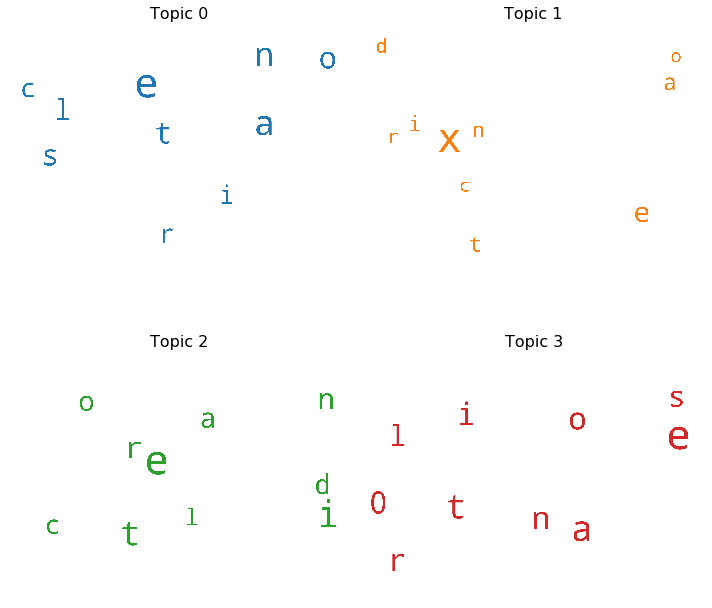

In [49]:
#Word cloud visualization

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()